# **เลื่อนลงไปตรง Attacut กับ OSKut**

In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt


In [ ]:
# Download and UnZIP Kaggle Word SegmentDataSet (LST20)
!gdown --id '1OxAPWlilK1gAl0_hDlMEHAUe_r-WogoG'
!unzip -qq '/content/dataset.zip'

Downloading...
From: https://drive.google.com/uc?id=1OxAPWlilK1gAl0_hDlMEHAUe_r-WogoG
To: /content/dataset.zip
100% 14.7M/14.7M [00:00<00:00, 97.1MB/s]


In [ ]:
#read file by glob
path_train = glob.glob('/content/dataset/train/*')
path_test = glob.glob('/content/dataset/test/*')
path_eval = glob.glob('/content/dataset/eval/*')

In [ ]:
path_train[1]

'/content/dataset/train/T11295.txt'

In [ ]:
def create_dataframe(list_path):
    data_list = []
    for item in list_path:
        with open(item, 'r') as f:
            for line in f:
                if line == '\n':
                    continue
                line = line.strip().split('\t')
                data_list.append(line)
    df = pd.DataFrame(data_list, columns = ['word', 'pos', 'entity-name', 'sentence-seg'])
    df['pos'] = df['pos'].fillna('O')
    df['entity-name'] = df['entity-name'].fillna('O')
    df['sentence-seg'] = df['sentence-seg'].fillna('O')
    return df

In [ ]:
train_df = create_dataframe(path_train)
test_df = create_dataframe(path_test)
eval_df = create_dataframe(path_eval)

In [ ]:
test_df['pos'].str.find('O')

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
207273   -1
207274   -1
207275   -1
207276   -1
207277   -1
Name: pos, Length: 207278, dtype: int64

In [ ]:
train_df

word pos entity-name sentence-seg
0        เฟอร์ดินานด์  NN       B_PER        B_CLS
1           เนื้อเต้น  VV           O        I_CLS
2                 ได้  AX           O        I_CLS
3                ร่วม  VV           O        I_CLS
4                 งาน  NN           O        I_CLS
...               ...  ..         ...          ...
2714721             "  PU           O        I_CLS
2714722             _  PU           O        I_CLS
2714723           นาย  NN       B_TTL        I_CLS
2714724           ตัน  NN       B_PER        I_CLS
2714725         กล่าว  VV           O        E_CLS

[2714726 rows x 4 columns]

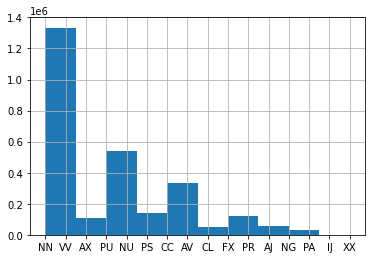

In [ ]:
train_df['pos'].hist()

In [ ]:
#Name entities count
check_df = eval_df['entity-name'].str.find('B_', end=2)
check_df = pd.DataFrame(check_df)
check_df['entity-name'].value_counts(0)

-1    217684
 0     23176
Name: entity-name, dtype: int64

In [ ]:
sentence_df = test_df['sentence-seg'].str.find('new line')
sentence_df = pd.DataFrame(sentence_df)
sentence_df['sentence-seg'].value_counts(0)

-1    207278
Name: sentence-seg, dtype: int64

# **Download Text**

In [ ]:
!gdown --id '11EAAsZ3ofLUOT5UIu85PTTkSvO-DKdhP' # WS_TEST
!gdown --id '1UDtrQ3UgaX7f8Lu9rptkPUly7_46U9Em' # NE_TEST

Downloading...
From: https://drive.google.com/uc?id=11EAAsZ3ofLUOT5UIu85PTTkSvO-DKdhP
To: /content/ws_test.txt
100% 106k/106k [00:00<00:00, 62.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UDtrQ3UgaX7f8Lu9rptkPUly7_46U9Em
To: /content/ne_test.txt
100% 789k/789k [00:00<00:00, 143MB/s]


In [ ]:
def readtxt(path):
    test_data = open(path, 'r')
    return test_data.readlines()

In [ ]:
text = readtxt('/content/ws_test.txt')
textNE_true = readtxt('/content/ne_test.txt')

In [ ]:
textNE = ''.join(textNE_true).replace('\n\n', ' ').replace('\n', '')

In [ ]:
textNE_true_replace = []
for t in textNE_true:
    if t == '\n':
        textNE_true_replace.append(' ')
    else: 
        textNE_true_replace.append(t.replace('\n',''))

print(textNE_true_replace)

['นาง', 'สุดารัตน์', ' ', 'เกยุราพันธ์', ' ', 'รมว.', 'สาธารณสุข', ' ', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', ' ', '100', '%', ' ', 'ว่า', ' ', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', ' ', '7', ' ', 'ก.พ.', 'นี้', ' ', 'ตั้งแต่', ' ', '16.00', 'น.', 'เป็นต้นไป', ' ', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', ' ', 'ชินวัตร', 'รัฐมนตรี', ' ', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', ' ', '16.30', 'น.', ' ', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', ' ', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', ' ', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', ' ', 'ไก่', 'ทอด', ' ', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', ' ', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', ' ', 'สุนทรเวช', ' ', 'ผู้', 'ว่า', 'ฯ', 'กทม.', ' ', 'และ', 'ม.ล.', 'ศิริเฉลิม', ' ', 'สวัสดิวัฒน์', ' ', 'หรือ', 'หมึกแดง', ' ', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', ' ', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อาหาร'

# **Attacut**

In [ ]:
!pip -qq install pythainlp
!pip -qq install epitran
!pip -qq install python-crfsuite
!pip -qq install attacut

     |████████████████████████████████| 11.5 MB 5.1 MB/s 
     |████████████████████████████████| 142 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 56.3 MB/s 
     |████████████████████████████████| 73 kB 2.6 MB/s 
     |████████████████████████████████| 743 kB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 87 kB 8.6 MB/s 
     |████████████████████████████████| 596 kB 23.6 MB/s 
     |████████████████████████████████| 473 kB 68.1 MB/s 
     |████████████████████████████████| 45 kB 4.0 MB/s 


In [ ]:
import pythainlp
from pythainlp import sent_tokenize
from pythainlp import word_tokenize
from pythainlp import word_tokenize, Tokenizer
import pandas as pd
from pythainlp.tokenize.multi_cut import find_all_segment, mmcut, segment
# from pythainlp.tokenize import dict_trie
from pythainlp.corpus.common import thai_words
from pythainlp.util import normalize

In [ ]:
# text = "สวัสดีจ้าทดลองตัดคำจ้าาา"
# print(word_tokenize(text))
# print(text)

In [ ]:
# data_path = '/content/ws_test.txt'

# test_data = open(data_path, 'r')

# text = test_data.readlines()
# word_normalize = normalize(text[0])
# print(word_normalize)
# print(word_tokenize(word_normalize))

In [ ]:



# test_text = word_tokenize(text[0], engine='attacut')
        
# print(test_text)


In [ ]:
def split(word):
    return list(word)

In [ ]:
import pandas as pd

In [ ]:
#prepare for submission
def submission(test_text):
    data = []
    label = []
    for i in test_text:
        a = split(i)
        
        for index, j in enumerate(a):
            if index == 0:
                label.append('B_WORD')
            elif index == len(a)-1:
                label.append('E_WORD')
            else:
                label.append('I_WORD') 
        data.extend(a)
        
    label = pd.DataFrame(label)
    data = pd.DataFrame(data)    
    data_submission = pd.concat([data, label], axis = 1)
    return data_submission
    

# submission(test_text)

# **OSKut**


In [ ]:
!pip -qq install OSKut
!pip -qq install sefr_cut

     |████████████████████████████████| 44.2 MB 1.3 MB/s 
     |████████████████████████████████| 312 kB 44.0 MB/s 
     |████████████████████████████████| 462 kB 71.9 MB/s 
     |████████████████████████████████| 8.7 MB 5.3 MB/s 


In [ ]:
import sys
import oskut
import sefr_cut
import numpy as np

In [ ]:
textNE[0:10000]

'นางสุดารัตน์ เกยุราพันธ์ รมว.สาธารณสุข แถลงถึงการจัดงานมหกรรมกินไก่ไทยปลอดภัย 100% ว่า รัฐบาลร่วมกับกทม.จัดงานดังกล่าวขึ้นที่ท้องสนามหลวงในวันเสาร์ที่ 7 ก.พ.นี้ ตั้งแต่ 16.00น.เป็นต้นไป ส่วนพ.ต.ท.ทักษิณ ชินวัตรรัฐมนตรี จะเดินทางมาถึงที่งานในเวลา 16.30น. เพื่อเยี่ยมชมนิทรรศการ และประกอบอาหารเมนู กระเพราไก่ไข่ดาวสุก ไก่ทอด ด้วยตัวเองและแจกจ่ายให้กับประชาชน โดยจะมีนายสมัคร สุนทรเวช ผู้ว่าฯกทม. และม.ล.ศิริเฉลิม สวัสดิวัฒน์ หรือหมึกแดง ร่วมปรุงอาหารด้วย ภายหลังที่นายกฯปรุงอาหารเสร็จจะร่วมรับประทานอาหารกับประชาชน และเดินทักทายเพื่อให้กำลังใจกับผู้ประกอบการตามบูทต่างๆ จากนั้นก็จะกล่าวปราศรัยด้วย ส่วนนิทรรศการและการแจกไก่และไข่สุกจะเริ่มตั้งแต่เวลา 16.00-18.00 นางสุดารัตน์ กล่าวต่อว่า วัตถุประสงค์ของงานเพื่อสร้างความเชื่อมั่นและความเข้าใจให้กับประชาชนว่าไก่และไข่สุกสามารถรับประทานได้ และความรู้ที่จะให้ก็ไม่เฉพาะแต่เรื่องไข้หวัดนกเท่านั้น แต่จะมีเรื่องการสาธิตปรุงอาหารให้ถูกหลักโภชนาการด้วย ตั้งแต่ขั้นตอนการเตรียมวัตถุดิบไปจนถึงวิธีการปรุง โดยกรมอนามัยและสมาคมไข่ไก่จะทำไข่พะโล้หม้อใหญ่ที่สุดใน

## Cut the text using OSKut

In [ ]:
select_textNE = textNE[0:]

In [ ]:
%%time
oskut.load_model(engine='tl-deepcut-lst20')
textNE_pred = oskut.OSKut(select_textNE)
print(textNE_pred)

lst20
['นาง', 'สุดารัตน์', ' ', 'เกยุราพันธ์', ' ', 'รมว.', 'สาธารณสุข', ' ', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', ' ', '100', '%', ' ', 'ว่า', ' ', 'รัฐบาล', 'ร่วมกับ', 'กทม', '.', 'จัด', 'งาน', 'ดังกล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', ' ', '7', ' ', 'ก.พ.', 'นี้', ' ', 'ตั้งแต่', ' ', '16.00', 'น', '.', 'เป็นต้นไป', ' ', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', ' ', 'ชินวัตร', 'รัฐมนตรี', ' ', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', ' ', '16.30น.', ' ', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', ' ', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', ' ', 'กระเพรา', 'ไก่', 'ไข่', 'ดาว', 'สุก', ' ', 'ไก่', 'ทอด', ' ', 'ด้วย', 'ตัวเอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', ' ', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', ' ', 'สุนทรเวช', ' ', 'ผู้', 'ว่า', 'ฯ', 'กทม', '.', ' ', 'และ', 'ม.ล.', 'ศิริเฉลิม', ' ', 'สวัสดิวัฒน์', ' ', 'หรือ', 'หมึก', 'แดง', ' ', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', ' ', 'ภายหลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', '

In [ ]:
# %%time
# oskut.load_model(engine='lst20', mode='LSTM_Attension')
# textNE_pred_lstm = oskut.OSKut(select_textNE)
# print(textNE_pred)

In [ ]:
print('TRUEDATA: ', end='')
print(textNE_true_replace)
print('PREDICT:  ', end='')
print(textNE_pred)

TRUEDATA: ['นาง', 'สุดารัตน์', ' ', 'เกยุราพันธ์', ' ', 'รมว.', 'สาธารณสุข', ' ', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', ' ', '100', '%', ' ', 'ว่า', ' ', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', ' ', '7', ' ', 'ก.พ.', 'นี้', ' ', 'ตั้งแต่', ' ', '16.00', 'น.', 'เป็นต้นไป', ' ', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', ' ', 'ชินวัตร', 'รัฐมนตรี', ' ', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', ' ', '16.30', 'น.', ' ', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', ' ', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', ' ', 'กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', ' ', 'ไก่', 'ทอด', ' ', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', ' ', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', ' ', 'สุนทรเวช', ' ', 'ผู้', 'ว่า', 'ฯ', 'กทม.', ' ', 'และ', 'ม.ล.', 'ศิริเฉลิม', ' ', 'สวัสดิวัฒน์', ' ', 'หรือ', 'หมึกแดง', ' ', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', ' ', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง

In [ ]:
len(textNE_pred)

68344

#### Find Special Word

In [ ]:
import re
i_addon = 0
special_words = []

for i, t in enumerate(textNE_true_replace[0:]):
    # re_str = '[\.]$|[\,]'
    re_str = '[\.]$'
    re_ = re.findall(re_str, t)
    # print(re_)
    
    if re_ == []:
        pass
    elif t == '.':
        pass
    else:
        if t != textNE_pred[i+i_addon]:
            i_addon += 1
        print(i,'\t', i_addon,'\ttrue: ' , t, '\tpred:', textNE_pred[i+i_addon-1],'|', textNE_pred[i+i_addon],'|', textNE_pred[i+i_addon+1])
        special_words.append(t)

5 	 0 	true:  รมว. 	pred:   | รมว. | สาธารณสุข
28 	 1 	true:  กทม. 	pred: . | จัด | งาน
43 	 2 	true:  ก.พ. 	pred:   | ตั้งแต่ |  
49 	 3 	true:  น. 	pred:   | ส่วน | พ.ต.ท.
53 	 4 	true:  พ.ต.ท. 	pred: ชินวัตร | รัฐมนตรี |  
69 	 5 	true:  น. 	pred:   | และ | ประกอบ
108 	 6 	true:  กทม. 	pred:   | สวัสดิวัฒน์ |  
111 	 7 	true:  ม.ล. 	pred: หมึก | แดง |  
298 	 8 	true:  กทม. 	pred: งาน | จะ | เริ่ม
312 	 9 	true:  พ.ต.ท. 	pred:   | โดย | นาย
331 	 10 	true:  กทม. 	pred: ออก | ร้าน | ของ
549 	 11 	true:  น. 	pred: ไทย | เพื่อ | การ
641 	 12 	true:  กทม. 	pred: แล้ว | จะ | ให้
716 	 13 	true:  ด.ช. 	pred:   | และ | ด.ช.
724 	 14 	true:  ด.ช. 	pred:   | ล่าสุด | ก็
733 	 15 	true:  ด.ช. 	pred: คือ |   | ด.ช.
753 	 16 	true:  ด.ช. 	pred: วันที่ |   | 3
777 	 17 	true:  ก.พ. 	pred: ว่า | ด | .ช.
778 	 18 	true:  น.พ. 	pred: .ช. | วิรัตน์ |  
796 	 19 	true:  รพ. 	pred: ตัว | อยู่ | ที่
800 	 20 	true:  ด.ช. 	pred:   | ได้ | เสียชีวิต
815 	 21 	true:  จ. 	pred: ผู้ | รักษา | รายงาน
823 	 2

IndexError: ignored

In [ ]:
special_words = np.append(np.unique(special_words), ['ร่วม','กับ','ดัง','กล่าว','ส่วน','ไข่ดาว','เอง','นายกรัฐมนตรี'])
print(special_words)

['..' '...' '....' '1.' '10.' '2.' '3.' '4.' '5.' '6.' '7.' '8.' '9.' 'ก.'
 'ก.ค.' 'ก.พ.' 'ก.ม.' 'ก.ย.' 'กก.' 'กกต.' 'กข.' 'กทม.' 'กม.' 'กมธ.'
 'กล่าว' 'กอ._รมน.' 'กับ' 'กิ่งอ.' 'ขสมก.' 'คตส.' 'คมช.' 'ครม.' 'คศ.' 'จ.'
 'จนท.' 'จว.' 'ชท.' 'ชม.' 'ซีพีเอฟ.' 'ด.ช.' 'ด.ญ.' 'ดร.' 'ดัง' 'ดาว' 'ต.'
 'ตชด.' 'ตร.' 'ถ.' 'ทบ.' 'ทอท.' 'ธ.ก.ส.' 'ธ.ค.' 'น.' 'น.ต.' 'น.พ.' 'น.ส.'
 'นปก.' 'นพ.' 'นสพ.' 'นายกรัฐมนตรี' 'ป.' 'ปชป.' 'ปบช.' 'ปอ.' 'ผกก.' 'ผญบ.'
 'ผบ.' 'ผบก.' 'ผวจ.' 'ผศ.' 'ผอ.' 'พ.ญ.' 'พ.ต.ท.' 'พ.ต.อ.' 'พ.ย.' 'พ.ร.บ.'
 'พ.ศ.' 'พ.อ.' 'พญ.' 'พปช.' 'พล.ต.' 'พล.ต.ต.' 'พล.ต.ท.' 'พล.ต.อ.' 'พล.ท.'
 'พล.ร.ท.' 'พล.ร.อ.' 'พล.อ.' 'พล.อ.ต.' 'พล.อ.อ.' 'พศ.' 'ภ.' 'ภ.จว.' 'ม.'
 'ม.ค.' 'ม.ล.' 'มอ.' 'มี.ค.' 'ร.ท.' 'ร.พ.' 'ร.อ.' 'รปภ.' 'รพ.' 'รมช.'
 'รมต.' 'รมว.' 'รศ.' 'ร่วม' 'ศ.' 'ศ.นพ.' 'ส.ค.' 'ส.ว.' 'ส.ส.' 'ส.ส.ร.'
 'สกว.' 'สคบ.' 'สตง.' 'สธ.' 'สน.' 'สนช.' 'สบพ.' 'สภ.ต.' 'สภ.อ.' 'สภอ.'
 'สว.สป.' 'ส่วน' 'หน.' 'อ.' 'อ.ส.ม.ท.' 'อคส.' 'อบต.' 'อย.' 'อาร์.เอส.'
 'เม.ย.' 'เอง' 'โทร.' 'ใข่ดาว' 'ไข่ดาว' 'ร่วม' 'กับ' 'ด

In [ ]:
def rm_small_word()

In [ ]:
re.findall('\d', 'Hello20dadas')

['2', '0']

In [ ]:
print(special_words_long)

['...', '....', '10.', 'ก.ค.', 'ก.พ.', 'ก.ม.', 'ก.ย.', 'กก.', 'กกต.', 'กข.', 'กทม.', 'กม.', 'กมธ.', 'กล่าว', 'กอ._รมน.', 'กับ', 'กิ่งอ.', 'ขสมก.', 'คตส.', 'คมช.', 'ครม.', 'คศ.', 'จนท.', 'จว.', 'ชท.', 'ชม.', 'ซีพีเอฟ.', 'ด.ช.', 'ด.ญ.', 'ดร.', 'ดัง', 'ดั่ง', 'ตชด.', 'ตร.', 'ทบ.', 'ทอท.', 'ธ.ก.ส.', 'ธ.ค.', 'น.ต.', 'น.พ.', 'น.ส.', 'นปก.', 'นพ.', 'นสพ.', 'ปชป.', 'ปบช.', 'ปอ.', 'ผกก.', 'ผญบ.', 'ผบ.', 'ผบก.', 'ผวจ.', 'ผศ.', 'ผอ.', 'พ.ญ.', 'พ.ต.ท.', 'พ.ต.อ.', 'พ.ย.', 'พ.ร.บ.', 'พ.ศ.', 'พ.อ.', 'พญ.', 'พปช.', 'พล.ต.', 'พล.ต.ต.', 'พล.ต.ท.', 'พล.ต.อ.', 'พล.ท.', 'พล.ร.ท.', 'พล.ร.อ.', 'พล.อ.', 'พล.อ.ต.', 'พล.อ.อ.', 'พศ.', 'ภ.จว.', 'ม.ค.', 'ม.ล.', 'มอ.', 'มี.ค.', 'ร.ท.', 'ร.พ.', 'ร.อ.', 'รปภ.', 'รพ.', 'รมช.', 'รมต.', 'รมว.', 'รศ.', 'ร่วม', 'ศ.นพ.', 'ส.ค.', 'ส.ว.', 'ส.ส.', 'ส.ส.ร.', 'สกว.', 'สคบ.', 'สตง.', 'สธ.', 'สน.', 'สนช.', 'สบพ.', 'สภ.ต.', 'สภ.อ.', 'สภอ.', 'สว.สป.', 'หน.', 'อ.ส.ม.ท.', 'อคส.', 'อบต.', 'อย.', 'อาร์.เอส.', 'เม.ย.', 'โทร.', 'ร่วม', 'กับ', 'ดัง', 'กล่าว', 'ส่วน']


In [ ]:
# NewMM
from pythainlp.tokenize import word_tokenize
from pythainlp.util import Trie

# Create Dict
custom_dictionary_trie = Trie(special_words_long)
# Load Model
oskut.load_model(engine='tl-deepcut-lst20', mode='LSTM_Attension')
# oskut.load_model(engine='deepcut', mode='LSTM_Attension')
# oskut.load_model(engine='lst20')

def rm_space(text):
    text_new = []
    for t in text:
        if t != ' ':
            text_new.append(t)

    return text_new

def pad_number(text):
    res = re.sub('(\d+(\.\d+)(\,)?)', r' \1 ', text).replace('  ',' ')
    # res = re.sub('(\d+(\.\d+)(\,)(\%)?)', r' \1 ', text).replace('  ',' ')
    return res

def newmm_tok(text, custom_dictionary):
    word_tok = word_tokenize(text, 
                            engine="newmm",
                            keep_whitespace = False,
                            custom_dict=custom_dictionary)  # ['โอเค', 'บ่', 'เรา', 'รัก', 'ภาษาถิ่น']
    return word_tok

def oskut_tok(text):
    # k = 100
    return np.array(oskut.OSKut(text))
    # return np.array(oskut.OSKut(text, k=k))

def pipeline_tok(text, custom_dictionary):
    words_pad_num = pad_number(text)
    words_list = newmm_tok(words_pad_num, custom_dictionary)

    # PRINT ZONE
    print('ori word: \t', end='')
    print(text)
    print('pad num: \t', end='')
    print(words_pad_num)
    print('newMM tok: \t', end='')
    print(words_list)

    results_tok = np.array([])
    for w in words_list:
        w_tok = oskut_tok(w)

        if np.array_equal(w_tok,w):
            results_tok = np.append(results_tok, w)
        else:
            for ws in w_tok:
                results_tok = np.append(results_tok, ws)

    return list(results_tok)

full_tok_pipeline = (pipeline_tok(textNE[0:2000], custom_dictionary_trie))

print('oskut tok: \t', end='')
print(full_tok_pipeline)

print()
print('label NE: \t', end='')
print(rm_space(textNE_true_replace))

lst20
ori word: 	นางสุดารัตน์ เกยุราพันธ์ รมว.สาธารณสุข แถลงถึงการจัดงานมหกรรมกินไก่ไทยปลอดภัย 100% ว่า รัฐบาลร่วมกับกทม.จัดงานดังกล่าวขึ้นที่ท้องสนามหลวงในวันเสาร์ที่ 7 ก.พ.นี้ ตั้งแต่ 16.00น.เป็นต้นไป ส่วนพ.ต.ท.ทักษิณ ชินวัตรรัฐมนตรี จะเดินทางมาถึงที่งานในเวลา 16.30น. เพื่อเยี่ยมชมนิทรรศการ และประกอบอาหารเมนู กระเพราไก่ไข่ดาวสุก ไก่ทอด ด้วยตัวเองและแจกจ่ายให้กับประชาชน โดยจะมีนายสมัคร สุนทรเวช ผู้ว่าฯกทม. และม.ล.ศิริเฉลิม สวัสดิวัฒน์ หรือหมึกแดง ร่วมปรุงอาหารด้วย ภายหลังที่นายกฯปรุงอาหารเสร็จจะร่วมรับประทานอาหารกับประชาชน และเดินทักทายเพื่อให้กำลังใจกับผู้ประกอบการตามบูทต่างๆ จากนั้นก็จะกล่าวปราศรัยด้วย ส่วนนิทรรศการและการแจกไก่และไข่สุกจะเริ่มตั้งแต่เวลา 16.00-18.00 นางสุดารัตน์ กล่าวต่อว่า วัตถุประสงค์ของงานเพื่อสร้างความเชื่อมั่นและความเข้าใจให้กับประชาชนว่าไก่และไข่สุกสามารถรับประทานได้ และความรู้ที่จะให้ก็ไม่เฉพาะแต่เรื่องไข้หวัดนกเท่านั้น แต่จะมีเรื่องการสาธิตปรุงอาหารให้ถูกหลักโภชนาการด้วย ตั้งแต่ขั้นตอนการเตรียมวัตถุดิบไปจนถึงวิธีการปรุง โดยกรมอนามัยและสมาคมไข่ไก่จะทำไข่พะโล้

# **Run Full Word Tokenization PipeLine** 

In [ ]:
%%time
full_tok_pipeline = (pipeline_tok(textNE[0:], custom_dictionary_trie))

ori word: 	นางสุดารัตน์ เกยุราพันธ์ รมว.สาธารณสุข แถลงถึงการจัดงานมหกรรมกินไก่ไทยปลอดภัย 100% ว่า รัฐบาลร่วมกับกทม.จัดงานดังกล่าวขึ้นที่ท้องสนามหลวงในวันเสาร์ที่ 7 ก.พ.นี้ ตั้งแต่ 16.00น.เป็นต้นไป ส่วนพ.ต.ท.ทักษิณ ชินวัตรรัฐมนตรี จะเดินทางมาถึงที่งานในเวลา 16.30น. เพื่อเยี่ยมชมนิทรรศการ และประกอบอาหารเมนู กระเพราไก่ไข่ดาวสุก ไก่ทอด ด้วยตัวเองและแจกจ่ายให้กับประชาชน โดยจะมีนายสมัคร สุนทรเวช ผู้ว่าฯกทม. และม.ล.ศิริเฉลิม สวัสดิวัฒน์ หรือหมึกแดง ร่วมปรุงอาหารด้วย ภายหลังที่นายกฯปรุงอาหารเสร็จจะร่วมรับประทานอาหารกับประชาชน และเดินทักทายเพื่อให้กำลังใจกับผู้ประกอบการตามบูทต่างๆ จากนั้นก็จะกล่าวปราศรัยด้วย ส่วนนิทรรศการและการแจกไก่และไข่สุกจะเริ่มตั้งแต่เวลา 16.00-18.00 นางสุดารัตน์ กล่าวต่อว่า วัตถุประสงค์ของงานเพื่อสร้างความเชื่อมั่นและความเข้าใจให้กับประชาชนว่าไก่และไข่สุกสามารถรับประทานได้ และความรู้ที่จะให้ก็ไม่เฉพาะแต่เรื่องไข้หวัดนกเท่านั้น แต่จะมีเรื่องการสาธิตปรุงอาหารให้ถูกหลักโภชนาการด้วย ตั้งแต่ขั้นตอนการเตรียมวัตถุดิบไปจนถึงวิธีการปรุง โดยกรมอนามัยและสมาคมไข่ไก่จะทำไข่พะโล้หม้อให

KeyboardInterrupt: ignored

In [ ]:
textNE

'นางสุดารัตน์ เกยุราพันธ์ รมว.สาธารณสุข แถลงถึงการจัดงานมหกรรมกินไก่ไทยปลอดภัย 100% ว่า รัฐบาลร่วมกับกทม.จัดงานดังกล่าวขึ้นที่ท้องสนามหลวงในวันเสาร์ที่ 7 ก.พ.นี้ ตั้งแต่ 16.00น.เป็นต้นไป ส่วนพ.ต.ท.ทักษิณ ชินวัตรรัฐมนตรี จะเดินทางมาถึงที่งานในเวลา 16.30น. เพื่อเยี่ยมชมนิทรรศการ และประกอบอาหารเมนู กระเพราไก่ไข่ดาวสุก ไก่ทอด ด้วยตัวเองและแจกจ่ายให้กับประชาชน โดยจะมีนายสมัคร สุนทรเวช ผู้ว่าฯกทม. และม.ล.ศิริเฉลิม สวัสดิวัฒน์ หรือหมึกแดง ร่วมปรุงอาหารด้วย ภายหลังที่นายกฯปรุงอาหารเสร็จจะร่วมรับประทานอาหารกับประชาชน และเดินทักทายเพื่อให้กำลังใจกับผู้ประกอบการตามบูทต่างๆ จากนั้นก็จะกล่าวปราศรัยด้วย ส่วนนิทรรศการและการแจกไก่และไข่สุกจะเริ่มตั้งแต่เวลา 16.00-18.00 นางสุดารัตน์ กล่าวต่อว่า วัตถุประสงค์ของงานเพื่อสร้างความเชื่อมั่นและความเข้าใจให้กับประชาชนว่าไก่และไข่สุกสามารถรับประทานได้ และความรู้ที่จะให้ก็ไม่เฉพาะแต่เรื่องไข้หวัดนกเท่านั้น แต่จะมีเรื่องการสาธิตปรุงอาหารให้ถูกหลักโภชนาการด้วย ตั้งแต่ขั้นตอนการเตรียมวัตถุดิบไปจนถึงวิธีการปรุง โดยกรมอนามัยและสมาคมไข่ไก่จะทำไข่พะโล้หม้อใหญ่ที่สุดใน

In [ ]:
readtxt('/content/ws_test.txt')[0]

'ที่ยังสถานการณ์ยังไม่คลี่คลายอาจส่งผลกระทบการค้าชายแดนไทย - กัมพูชา ว่า เท่าที่เข้าไปดำเนินการตรวจสอบยังไม่พบว่ามีการปิดด่านบริเวณดังกล่าว และที่สำคัญการค้าระหว่างไทยและกัมพูชาส่วนใหญ่จะมีปริมาณมากที่ด่านปอยเปต อ. อรัญประเทศ จ. สระแก้ว มากกว่าด่านอื่น ๆ ส่วนที่กันทรลักษ์เป็นด่านขนาดเล็กจะเน้นด้านท่องเที่ยว จึงไม่น่าส่งผลกระทบต่อบรรยากาศการค้าชายแดนไทย - กัมพูชาแต่อย่างใด อย่างไรก็ตาม แม้จะมีปัญหาความขัดแย้งเรื่องเขาพระวิหาร แต่ปริมาณการค้าชายแดนไทย - กัมพูชาในปีที่ผ่านมายังคงเพิ่มขึ้น โดยมีจำปริมาณทั้งสิ้น 48,406 ล้านบาท เพิ่มขึ้นเมื่อเทียบกับปี 2549 ร้อยละ 0.2 โดยเป็นการส่งออกจากไทยทั้งสิ้น 46,718 ล้านบาท ขณะที่มีการนำเข้าสินค้าจากกัมพูชาเพียง 1,689 ล้านบาทเท่านั้น ทั้งนี้ ในช่วง 5 เดือนแรกปีนี้ ( ม.ค. - พ.ค. 2551 ) การค้าทั้งสองประเทศมีมูลค่ารวมทั้งสิ้น 29,677 ล้านบาท เพิ่มขึ้นเมื่อเทียบกับช่วงเดียวกันของปีที่ผ่านมาร้อยละ 59.2 โดยไทยส่งออกมูลค่าทั้งสิ้น 28,680 ล้านบาท และมีการนำเข้าเพียง 997 ล้านบาท ถกนอกรอบ " ไทย - เขมร " 8 ชม. สรุป " ตรึงกำลังทหาร - ห้ามยิง " ผลการประชุมร่วมไทย - 

In [ ]:
%%time
textWS = readtxt('/content/ws_test.txt')[0]
full_tok_pipeline_ws = (pipeline_tok(textWS, custom_dictionary_trie))

ori word: 	ที่ยังสถานการณ์ยังไม่คลี่คลายอาจส่งผลกระทบการค้าชายแดนไทย - กัมพูชา ว่า เท่าที่เข้าไปดำเนินการตรวจสอบยังไม่พบว่ามีการปิดด่านบริเวณดังกล่าว และที่สำคัญการค้าระหว่างไทยและกัมพูชาส่วนใหญ่จะมีปริมาณมากที่ด่านปอยเปต อ. อรัญประเทศ จ. สระแก้ว มากกว่าด่านอื่น ๆ ส่วนที่กันทรลักษ์เป็นด่านขนาดเล็กจะเน้นด้านท่องเที่ยว จึงไม่น่าส่งผลกระทบต่อบรรยากาศการค้าชายแดนไทย - กัมพูชาแต่อย่างใด อย่างไรก็ตาม แม้จะมีปัญหาความขัดแย้งเรื่องเขาพระวิหาร แต่ปริมาณการค้าชายแดนไทย - กัมพูชาในปีที่ผ่านมายังคงเพิ่มขึ้น โดยมีจำปริมาณทั้งสิ้น 48,406 ล้านบาท เพิ่มขึ้นเมื่อเทียบกับปี 2549 ร้อยละ 0.2 โดยเป็นการส่งออกจากไทยทั้งสิ้น 46,718 ล้านบาท ขณะที่มีการนำเข้าสินค้าจากกัมพูชาเพียง 1,689 ล้านบาทเท่านั้น ทั้งนี้ ในช่วง 5 เดือนแรกปีนี้ ( ม.ค. - พ.ค. 2551 ) การค้าทั้งสองประเทศมีมูลค่ารวมทั้งสิ้น 29,677 ล้านบาท เพิ่มขึ้นเมื่อเทียบกับช่วงเดียวกันของปีที่ผ่านมาร้อยละ 59.2 โดยไทยส่งออกมูลค่าทั้งสิ้น 28,680 ล้านบาท และมีการนำเข้าเพียง 997 ล้านบาท ถกนอกรอบ " ไทย - เขมร " 8 ชม. สรุป " ตรึงกำลังทหาร - ห้ามยิง " ผลการประชุม

In [ ]:
full_tok_oskut = oskut_tok(textWS)

In [ ]:
print('no process: \t:', end='')
print(rm_space(list(full_tok_oskut)))

print('post process: \t:', end='')
print(full_tok_pipeline_ws)

no process: 	:['ที่', 'ยัง', 'สถานการณ์', 'ยัง', 'ไม่', 'คลี่คลาย', 'อาจ', 'ส่ง', 'ผล', 'กระทบ', 'การ', 'ค้า', 'ชายแดน', 'ไทย', '-', 'กัมพูชา', 'ว่า', 'เท่า', 'ที่', 'เข้า', 'ไป', 'ดำเนินการ', 'ตรวจสอบ', 'ยัง', 'ไม่', 'พบ', 'ว่า', 'มีการ', 'ปิด', 'ด่าน', 'บริเวณ', 'ดังกล่าว', 'และ', 'ที่', 'สำคัญ', 'การ', 'ค้า', 'ระหว่าง', 'ไทย', 'และ', 'กัมพูชา', 'ส่วนใหญ่', 'จะ', 'มี', 'ปริมาณ', 'มาก', 'ที่', 'ด่าน', 'ปอยเปต', 'อ.', 'อรัญประเทศ', 'จ.', 'สระแก้ว', 'มาก', 'กว่า', 'ด่าน', 'อื่น', 'ๆ', 'ส่วน', 'ที่', 'กัน', 'ทรลักษ์', 'เป็น', 'ด่าน', 'ขนาด', 'เล็ก', 'จะ', 'เน้น', 'ด้าน', 'ท่องเที่ยว', 'จึง', 'ไม่', 'น่า', 'ส่ง', 'ผล', 'กระทบ', 'ต่อ', 'บรรยากาศ', 'การ', 'ค้า', 'ชายแดน', 'ไทย', '-', 'กัมพูชา', 'แต่อย่างใด', 'อย่างไรก็ตาม', 'แม้', 'จะ', 'มี', 'ปัญหา', 'ความ', 'ขัดแย้ง', 'เรื่อง', 'เขา', 'พระวิหาร', 'แต่', 'ปริมาณ', 'การ', 'ค้า', 'ชายแดน', 'ไทย', '-', 'กัมพูชา', 'ใน', 'ปี', 'ที่', 'ผ่าน', 'มา', 'ยังคง', 'เพิ่ม', 'ขึ้น', 'โดย', 'มี', 'จำปริมาณ', 'ทั้งสิ้น', '48', ',406', 'ล้าน', 'บาท', 'เพิ่ม

In [ ]:
def char_split_text_to_word(text):

    word_tag = []
    # text_split = text.split(' ')
    # print(text_split)
    # isfirsttime = True
    for word in text:
        # Fix bug begining word
        isbegining = True
        # if not isfirsttime:
        #     word_tag.append(('', 'O'))

        # isfirsttime = False
        for c in word:
            if c == '"' or c == '':
                word_tag.append((c, 'I_WORD'))
                continue

            elif c == ' ':
                word_tag.append(('', 'O'))
            elif c == word[0] and isbegining:
                word_tag.append((c, 'B_WORD'))
                isbegining = False
            elif c == word[-1]:
                word_tag.append((c, 'E_WORD'))
            else:
                word_tag.append((c, 'I_WORD'))
            
    return pd.DataFrame(word_tag, columns=['Id', 'Predicted'])

In [ ]:
df_full_tok_pipeline_ws = char_split_text_to_word(full_tok_pipeline_ws)
df_full_tok_pipeline_ws

Id Predicted
0      ท    B_WORD
1      ี    I_WORD
2      ่    E_WORD
3      ย    B_WORD
4      ั    I_WORD
...   ..       ...
35177  ย    E_WORD
35178  แ    B_WORD
35179  ล    I_WORD
35180  ้    I_WORD
35181  ว    E_WORD

[35182 rows x 2 columns]

#### **Load test**

In [ ]:
!gdown --id '1zcSGEPXk-DotYSgkU3vHxLiy6kmYqNWX'
!unzip 'nlp-1-word-segmentation-without-dataset.zip'

Downloading...
From: https://drive.google.com/uc?id=1zcSGEPXk-DotYSgkU3vHxLiy6kmYqNWX
To: /content/nlp-1-word-segmentation-without-dataset.zip
100% 101k/101k [00:00<00:00, 88.2MB/s]
Archive:  nlp-1-word-segmentation-without-dataset.zip
  inflating: nlp-1-word-segmentation/ws_list.txt  
  inflating: nlp-1-word-segmentation/ws_sample_submission.csv  
  inflating: nlp-1-word-segmentation/ws_test.txt  


In [ ]:
df_sample = pd.read_csv('/content/nlp-1-word-segmentation/ws_sample_submission.csv')
df_sample.head()

Id Predicted
0   1    B_WORD
1   2    I_WORD
2   3    E_WORD
3   4       NaN
4   5       NaN

In [ ]:
df_sample.shape

(35182, 2)

In [ ]:
df_full_tok_pipeline_ws['Id'] = df_sample['Id'].to_numpy()

In [ ]:
df_full_tok_pipeline_ws.to_csv('submision8_postprocess_regex.csv', index=False)

In [ ]:
print(len(full_tok_pipeline_ws))
print(full_tok_pipeline_ws)

8145
['ที่', 'ยัง', 'สถานการณ์', 'ยัง', 'ไม่', 'คลี่คลาย', 'อาจ', 'ส่ง', 'ผล', 'กระทบ', 'การ', 'ค้า', 'ชายแดน', 'ไทย', '-', 'กัมพูชา', 'ว่า', 'เท่า', 'ที่', 'เข้า', 'ไป', 'ดำเนินการ', 'ตรวจสอบ', 'ยัง', 'ไม่', 'พบ', 'ว่า', 'มีการ', 'ปิด', 'ด่าน', 'บริเวณ', 'ดัง', 'กล่าว', 'และ', 'ที่', 'สำคัญ', 'การ', 'ค้า', 'ระหว่าง', 'ไทย', 'และ', 'กัมพูชา', 'ส่วน', 'ใหญ่', 'จะ', 'มี', 'ปริมาณ', 'มาก', 'ที่', 'ด่าน', 'ปอยเปต', 'อ.', 'อรัญประเทศ', 'จ.', 'สระแก้ว', 'มาก', 'กว่า', 'ด่าน', 'อื่น', 'ๆ', 'ส่วน', 'ที่', 'กันทรลักษ์', 'เป็น', 'ด่าน', 'ขนาด', 'เล็ก', 'จะ', 'เน้น', 'ด้าน', 'ท่องเที่ยว', 'จึง', 'ไม่', 'น่า', 'ส่ง', 'ผล', 'กระทบ', 'ต่อ', 'บรรยากาศ', 'การ', 'ค้า', 'ชายแดน', 'ไทย', '-', 'กัมพูชา', 'แต่อย่างใด', 'อย่างไรก็ตาม', 'แม้', 'จะ', 'มี', 'ปัญหา', 'ความ', 'ขัดแย้ง', 'เรื่อง', 'เขา', 'พระวิหาร', 'แต่', 'ปริมาณ', 'การ', 'ค้า', 'ชายแดน', 'ไทย', '-', 'กัมพูชา', 'ใน', 'ปี', 'ที่', 'ผ่าน', 'มา', 'ยังคง', 'เพิ่ม', 'ขึ้น', 'โดย', 'มี', 'จำปริมาณ', 'ทั้งสิ้น', '48', ',', '406', 'ล้าน', 'บาท', 'เพิ่ม'

#### Create DataFrame

In [ ]:
df_pred = pd.DataFrame(textNE_pred, columns=['word']) 
df_true = pd.DataFrame(textNE_true_replace, columns=['word']) 

In [ ]:
df_pred.shape, df_true.shape

#### Define Function to split the word tag

In [ ]:
def char_split_word_tag(df):
    list_word = df['word'].tolist()
    word_tag = []
    for word in list_word:
        if word == ' ':
            word_tag.append(('', 'O'))
            continue
        for c in word:
            if c == '"' or c == '':
                word_tag.append((c, 'I_WORD'))
                continue
            elif c==' ':
                word_tag.append(('', 'O'))
            elif c == word[0]:
                word_tag.append((c, 'B_WORD'))
            elif c == word[-1]:
                word_tag.append((c, 'E_WORD'))
            else:
                word_tag.append((c, 'I_WORD'))
    return pd.DataFrame(word_tag, columns=['Id', 'Predicted'])


In [ ]:
#prepare for submission # Version 3.1 using enumerate not include 'O's def text_to_submission(test_text):     data = []     label = []     id = []     for i in test_text:         a = split(i)         if i == ' ':             label.append('O')             continue          for index, cha_inside in enumerate(a):             if index == 0:                 label.append('B_WORD')             elif index == len(a)-1:                 label.append('E_WORD')             elif cha_inside == ' ':                 label.append('O')             else:                 label.append('I_WORD')          data.extend(a)      label = pd.DataFrame(label)     data = pd.DataFrame(data)       data_submission = pd.concat([data, label], axis = 1)     data_submission.columns = ['Id', 'Predicted']      id1 = data_submission['Id']     for i,n in enumerate(id1):         id.append(i+1)      id = pd.DataFrame(id)          final_submission = pd.concat([id, label], axis = 1)     final_submission.columns = ['Id', 'Predicted


## split word tag

In [ ]:
df_pred_tag = char_split_word_tag(df_pred).to_numpy()
df_true_tag = char_split_word_tag(df_true).to_numpy()

print(df_true_tag.shape, df_pred_tag.shape)

In [ ]:
df_true_tag[:,1]

## Test F1 Scores

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(df_true_tag[:,1], df_pred_tag[:,1], average='macro')


In [ ]:
def f1_score_ez(text_pred, text_true):
    df_pred     = pd.DataFrame(text_pred, columns=['word']) 
    df_true     = pd.DataFrame(text_true, columns=['word']) 

    df_tag_pred = char_split_word_tag(df_pred).to_numpy()
    df_tag_true = char_split_word_tag(df_true).to_numpy()
    # print(f"true: {df_tag_true.shape}")
    # print(f"pred: {df_tag_pred.shape}")
    
    return f1_score(df_tag_true[:,1], df_tag_pred[:,1], average='macro')

In [ ]:
def df_tag_ez(text_pred):
    df_pred     = pd.DataFrame(text_pred, columns=['word']) 
    df_tag_pred = char_split_word_tag(df_pred)
    df_tag_pred['Id'] = np.arange(1,len(df_tag_pred)+1)
    return df_tag_pred

def dropO(df):
    str1 = df.columns[1]
    return df[df[str1] != 'O']

In [ ]:
print(f1_score_ez(full_tok_pipeline, rm_space(textNE_true_replace)))

0.9675051431133141


# **Comparing**
1. OSKut (tl-deepcut-lst20)
2. Auttakut
3. DeepCut

In [ ]:
!pip install attacut -qq
!pip install deepcut -qq

#### Predicting 'OSKut', 'attacut', 'deepcut',  'newmm'

In [ ]:
def word_tokenize_ez(text, engine='newmm'):
    return word_tokenize(textNE, keep_whitespace=True,
                         engine=engine)

In [ ]:
len(textNE)

252376

In [ ]:
text_len = 1000

In [ ]:
from oskut import extract_features

In [ ]:
extract_features.get_convo_nn2()

AttributeError: ignored

In [ ]:
%%time
oskut.load_model(engine='lst20', mode='LSTM_Attension')
oskut_pred = oskut.OSKut(textNE[:text_len]) # lst20, LSTM Attension
print(oskut_pred)

['นาง', 'สุดารัตน์', ' ', 'เกยุราพันธ์', ' ', 'รมว.', 'สาธารณสุข', ' ', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', ' ', '100', '%', ' ', 'ว่า', ' ', 'รัฐบาล', 'ร่วมกับ', 'กทม.', 'จัด', 'งาน', 'ดังกล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่', ' ', '7', ' ', 'ก.พ.', 'นี้', ' ', 'ตั้งแต่', ' ', '16.00', 'น.', 'เป็นต้นไป', ' ', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', ' ', 'ชินวัตร', 'รัฐมนตรี', ' ', 'จะ', 'เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', ' ', '16.30', 'น.', ' ', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', ' ', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', ' ', 'กระเพรา', 'ไก่ไข่', 'ดาว', 'สุก', ' ', 'ไก่', 'ทอด', ' ', 'ด้วย', 'ตัวเอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', ' ', 'โดย', 'จะ', 'มี', 'นาย', 'สมัคร', ' ', 'สุนทรเวช', ' ', 'ผู้', 'ว่า', 'ฯ', 'กทม.', ' ', 'และ', 'ม.ล.', 'ศิริเฉลิม', ' ', 'สวัสดิวัฒน์', ' ', 'หรือ', 'หมึก', 'แดง', ' ', 'ร่วม', 'ปรุง', 'อาหาร', 'ด้วย', ' ', 'ภายหลัง', 'ที่', 'นายก', 'ฯ', 'ปรุง', 'อาหาร', 'เสร็จ', '

In [ ]:
%%time
oskut.load_model(engine='tl-deepcut-lst20')
oskut_pred = oskut.OSKut(textNE[:text_len]) # lst20, Normal

lst20
CPU times: user 1.34 s, sys: 18 ms, total: 1.36 s
Wall time: 1.79 s


In [ ]:
%%time
oskut.load_model(engine='lst20', mode='LSTM')
oskut_pred = oskut.OSKut(textNE) # lst20, LSTM

In [ ]:
%%time
oskut.load_model(engine='tl-deepcut-lst20')
oskut_pred = oskut.OSKut(textNE) # tl-deepcut-lst20

In [ ]:
%%time
auttacut_pred = word_tokenize_ez(textNE, engine='attacut')

In [ ]:
%%time
deepcut_pred  = word_tokenize_ez(textNE, engine='deepcut')

In [ ]:
%%time
newmm_pred    = word_tokenize_ez(textNE, engine='newmm')


#### **Test F1 Score**

In [ ]:
oskut_score = f1_score_ez(oskut_pred, textNE_true_replace)
auttacut_score = f1_score_ez(auttacut_pred, textNE_true_replace)
deepcut_score = f1_score_ez(deepcut_pred, textNE_true_replace)
newmm_score = f1_score_ez(newmm_pred, textNE_true_replace)

score_arrays = np.array([oskut_score, auttacut_score, deepcut_score, newmm_score])

In [ ]:
(df_tag_ez(textNE_true_replace))

In [ ]:
df_pred_drop = dropO(df_tag_ez(textNE_true_replace))
df_pred_drop

In [ ]:
df_pred_drop.to_csv('solution_file_1.csv', index=False)

In [ ]:
score_arrays
method_arrays = ['oskut','auttacut','deepcut','newmm']

In [ ]:
df = pd.DataFrame(zip(method_arrays, score_arrays), columns=['Method','F1-Score'])
df

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
graph = sns.barplot(x='Method', y="F1-Score", data = df)
for p in graph.patches:
        graph.annotate('{:.4f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')


In [ ]:
['oskut','auttacut','deepcut','newmm'])

In [ ]:
attacut_pred, deepcut_pred, longest_pred, newmm_pred = res


In [ ]:
textNE

In [ ]:
with open('exp_ws_test.txt', 'w') as f:
    f.write(textNE)
